**KLASIFIKASI ALGORITMA NAIVE BAYES DENGAN PYTHON**

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('covid19.csv')
dataset.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

**Membaca dataset**

In [5]:
df = pd.read_csv('covid19.csv')
dataset.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


**Untuk mengetahui informasi pada dataset kita**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  9680 non-null   object 
 1   Country/Region  32065 non-null  object 
 2   Lat             32065 non-null  float64
 3   Long            32065 non-null  float64
 4   Date            32065 non-null  object 
 5   Confirmed       32065 non-null  int64  
 6   Deaths          32065 non-null  int64  
 7   Recovered       32065 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ MB


**Untuk mengetahui apakah ada data kosong pada dataset atau tidak**

In [7]:
dataset.empty

False

**Mengubah tipe data string kategorikal menjadi numerik**

In [8]:
en = LabelEncoder()

dataset['Country/Region'] = en.fit_transform(dataset['Country/Region'])
dataset.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,0,33.0000,65.0000,1/22/20,0,0,0
1,NaN,1,41.1533,20.1683,1/22/20,0,0,0
2,NaN,2,28.0339,1.6596,1/22/20,0,0,0
3,NaN,3,42.5063,1.5218,1/22/20,0,0,0
4,NaN,4,-11.2027,17.8739,1/22/20,0,0,0


**Menentukan x dan y pada dataset kita**

In [9]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
x

array([[nan, 0, 33.0, ..., '1/22/20', 0, 0],
       [nan, 1, 41.1533, ..., '1/22/20', 0, 0],
       [nan, 2, 28.0339, ..., '1/22/20', 0, 0],
       ...,
       [nan, 38, -11.6455, ..., '5/21/20', 34, 1],
       [nan, 166, 38.861034, ..., '5/21/20', 2350, 44],
       [nan, 97, -29.609988, ..., '5/21/20', 1, 0]], dtype=object)

In [11]:
y

array([0, 0, 0, ..., 8, 0, 0])

**Menampilkan jumlah data dari x_train dan x_test**

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x, y , test_size=0.2, random_state=123)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  25652
x_test =  6413
y_train =  25652
y_test =  6413


In [13]:
x_train

array([[nan, 22, -22.3285, ..., '1/31/20', 0, 0],
       [nan, 121, 52.1326, ..., '3/9/20', 321, 3],
       [nan, 14, 13.1939, ..., '1/23/20', 0, 0],
       ...,
       [nan, 162, 63.0, ..., '5/6/20', 23918, 2941],
       [nan, 45, 35.1264, ..., '3/21/20', 84, 0],
       [nan, 46, 49.8175, ..., '4/6/20', 4822, 78]], dtype=object)

In [14]:
x_test

array([[nan, 150, 8.460555000000001, ..., '4/2/20', 2, 0],
       ['Shanxi', 36, 37.5777, ..., '2/25/20', 133, 0],
       [nan, 185, 15.552727, ..., '2/18/20', 0, 0],
       ...,
       [nan, 44, 22.0, ..., '4/22/20', 1189, 40],
       [nan, 55, 1.5, ..., '5/20/20', 890, 7],
       [nan, 176, 48.3794, ..., '5/3/20', 11913, 288]], dtype=object)

In [15]:
y_train

array([   0,    0,    0, ..., 4074,    0,    0])

In [16]:
y_test

array([   0,   98,    0, ...,  341,   22, 1548])

**VISUALISASI DATA DI PYTHON PANDAS, MATPLOTLIB & NUMPY, MEMBACA DAN MENGOLAH FILE CSV**


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
indonesia = df[df['Country/Region'] == 'Indonesia']
indonesia

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
132,NaN,Indonesia,-0.7893,113.9213,1/22/20,0,0,0
397,NaN,Indonesia,-0.7893,113.9213,1/23/20,0,0,0
662,NaN,Indonesia,-0.7893,113.9213,1/24/20,0,0,0
927,NaN,Indonesia,-0.7893,113.9213,1/25/20,0,0,0
1192,NaN,Indonesia,-0.7893,113.9213,1/26/20,0,0,0
...,...,...,...,...,...,...,...,...
30872,NaN,Indonesia,-0.7893,113.9213,5/17/20,17514,1148,4129
31137,NaN,Indonesia,-0.7893,113.9213,5/18/20,18010,1191,4324
31402,NaN,Indonesia,-0.7893,113.9213,5/19/20,18496,1221,4467
31667,NaN,Indonesia,-0.7893,113.9213,5/20/20,19189,1242,4575


In [19]:
kasus = indonesia[indonesia['Confirmed']>0]
kasus

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
10732,NaN,Indonesia,-0.7893,113.9213,3/2/20,2,0,0
10997,NaN,Indonesia,-0.7893,113.9213,3/3/20,2,0,0
11262,NaN,Indonesia,-0.7893,113.9213,3/4/20,2,0,0
11527,NaN,Indonesia,-0.7893,113.9213,3/5/20,2,0,0
11792,NaN,Indonesia,-0.7893,113.9213,3/6/20,4,0,0
...,...,...,...,...,...,...,...,...
30872,NaN,Indonesia,-0.7893,113.9213,5/17/20,17514,1148,4129
31137,NaN,Indonesia,-0.7893,113.9213,5/18/20,18010,1191,4324
31402,NaN,Indonesia,-0.7893,113.9213,5/19/20,18496,1221,4467
31667,NaN,Indonesia,-0.7893,113.9213,5/20/20,19189,1242,4575


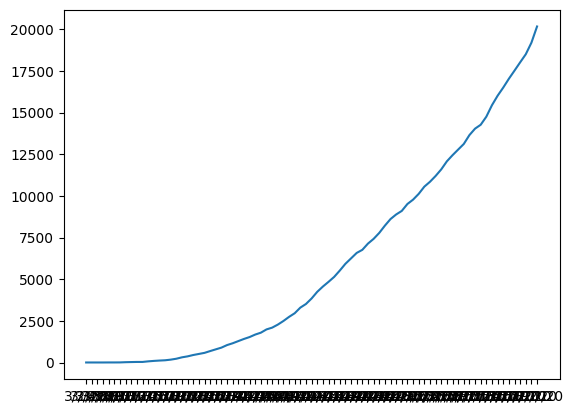

In [20]:
plt.plot(kasus['Date'], kasus['Confirmed'])
plt.show()

In [21]:
kasusmei = kasus[kasus.Date >= '5/1/20']
kasusmei

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
26632,NaN,Indonesia,-0.7893,113.9213,5/1/20,10551,800,1591
26897,NaN,Indonesia,-0.7893,113.9213,5/2/20,10843,831,1665
27162,NaN,Indonesia,-0.7893,113.9213,5/3/20,11192,845,1876
27427,NaN,Indonesia,-0.7893,113.9213,5/4/20,11587,864,1954
27692,NaN,Indonesia,-0.7893,113.9213,5/5/20,12071,872,2197
27957,NaN,Indonesia,-0.7893,113.9213,5/6/20,12438,895,2317
28222,NaN,Indonesia,-0.7893,113.9213,5/7/20,12776,930,2381
28487,NaN,Indonesia,-0.7893,113.9213,5/8/20,13112,943,2494
28752,NaN,Indonesia,-0.7893,113.9213,5/9/20,13645,959,2607
29017,NaN,Indonesia,-0.7893,113.9213,5/10/20,14032,973,2698


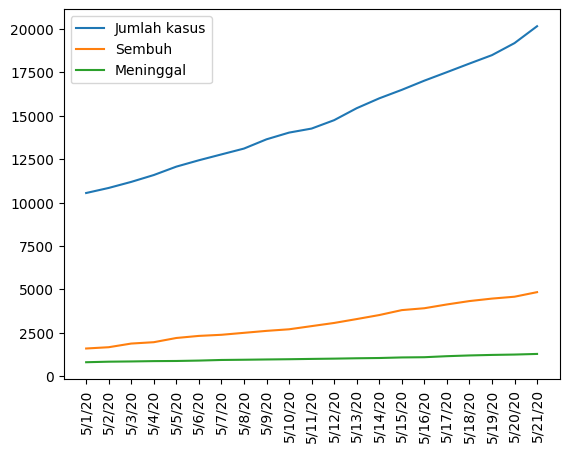

In [22]:
plt.plot(kasusmei.Date, kasusmei.Confirmed)
plt.plot(kasusmei.Date, kasusmei.Recovered)
plt.plot(kasusmei.Date, kasusmei.Deaths)
plt.xticks(rotation = 'vertical')
plt.legend(['Jumlah kasus', 'Sembuh', 'Meninggal'])
plt.show()

# **KESIMPULAN:**
Setelah mempelajari klasifikasi dataset menggunakan algoritma **Naive Bayes dengan bantuan pandas dan matplotlib**, dapat disimpulkan bahwa:

1. **Naive Bayes** merupakan metode klasifikasi yang sederhana namun efektif, terutama untuk dataset dengan fitur kategorikal dan bersifat independen antar fitur.

2. **Dengan pandas**, proses pembersihan data, analisis eksploratif, dan manipulasi data menjadi lebih mudah, cepat, dan efisien.

3. **Visualisasi menggunakan matplotlib** membantu dalam memahami distribusi data, korelasi antar fitur, serta memvisualisasikan hasil klasifikasi, yang sangat berguna dalam evaluasi model.

4. Meskipun Naive Bayes memiliki asumsi independensi antar fitur, hasil klasifikasinya tetap cukup akurat untuk data sederhana dan bisa menjadi baseline model sebelum mencoba metode lain yang lebih kompleks.

5.  ketiga alat ini membentuk fondasi kuat dalam analisis data dan pengembangan model machine learning sederhana.